In [1]:
import pandas as pd

df = pd.read_csv("DataSet.csv")

In [2]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Fake
0,1,0.000,2,42,1,0,0,0,102,678,405,0
1,1,0.067,2,0,0,0,0,0,58,334,434,0
2,1,0.000,0,0,0,0,0,0,44,539,364,0
3,1,0.000,2,14,0,0,0,0,188,3098,286,0
4,1,0.000,2,0,0,0,0,1,496,1079,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0.000,2,2,0,1,0,0,8,661,1562,1
1196,0,0.000,0,0,0,0,0,0,0,2,223,1
1197,1,0.000,2,58,0,1,0,0,47,296,4909,1
1198,1,0.143,1,0,0,1,0,0,0,5,67,1


In [3]:
X=df.iloc[:, 0:11].values
X[0]

array([  1.,   0.,   2.,  42.,   1.,   0.,   0.,   0., 102., 678., 405.])

In [5]:
y=df.iloc[:,11].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [7]:
def printColumn(number):
  switcher = {
      0: "Profile Pic",
      1: "Nums/length Username",
      2: "Full Name Words",
      3: "Bio Length",
      4: "External URL",
      5: "Private",
      6: "Verified",
      7: "Business",
      8: "#Post",
      9: "#Followers",
      10: "#Following",
  }
  return switcher.get(number, "Invalid Column")

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], printColumn(indices[f])))

Feature ranking:
1. feature 10 (0.235535) #Following
2. feature 7 (0.129542) Business
3. feature 3 (0.124219) Bio Length
4. feature 4 (0.117293) External URL
5. feature 9 (0.105674) #Followers
6. feature 8 (0.070204) #Post
7. feature 1 (0.064897) Nums/length Username
8. feature 6 (0.051121) Verified
9. feature 2 (0.041727) Full Name Words
10. feature 0 (0.033368) Profile Pic
11. feature 5 (0.026420) Private


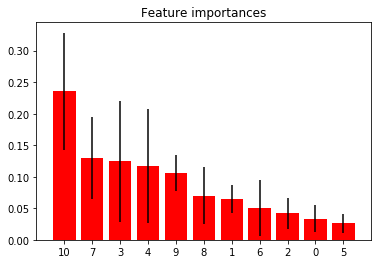

In [8]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()